# Converting DFA to NFA (easy!) and NFA to DFA (harder!).


In [27]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

L(dfaD1) = { w | w has exactly two 0's}

In [30]:
dfaD1 = md2mc('''
  DFA
  I : 0 -> S1
  I : 1 -> I
  S1: 0 -> F
  S1: 1 -> S1
  F : 0 -> S2
  F : 1 -> F
  S2: 0|1 -> S2
''')

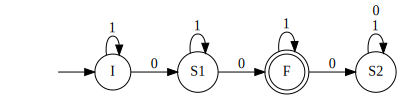

In [31]:
dotObj_dfa(dfaD1, FuseEdges=True)

L(dfaD2) = { w | w has at least two 1's}

In [32]:
dfaD2 = md2mc('''
  DFA
  I : 0 -> I
  I : 1 -> S1
  S1: 0 -> S1
  S1: 1 -> F
  F : 0|1 -> F
''')

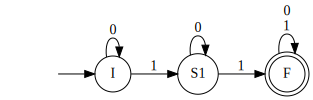

In [33]:
dotObj_dfa(dfaD2, FuseEdges=True)

In [34]:
dfaD3 = intersect_dfa(dfaD1, dfaD2)

In [35]:
len(dfaD3["Q"])

12

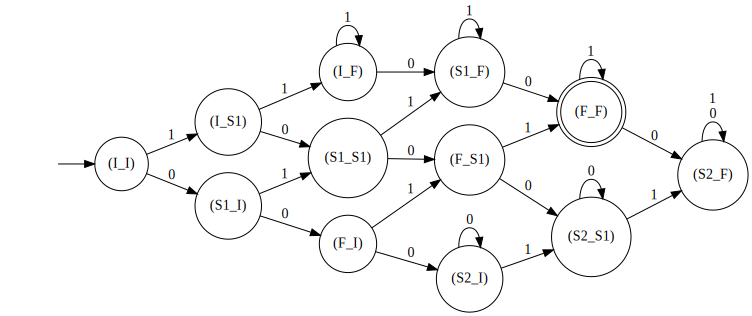

In [36]:
dotObj_dfa(dfaD3, FuseEdges=True)

In [ ]:
nfahas0101 = md2mc('''
  NFA
  I : 0|1 -> I
  I : "" -> A
  A : 0 -> B
  B : 1 -> C
  C : 0 -> D
  D : 1 -> E
  E : 0|1 -> E
  E : "" -> F
  ''')

In [ ]:
dotObj_nfa(nfahas0101, FuseEdges=True)

In [ ]:
dfahas0101 = nfa2dfa(nfahas0101, STATENAME_MAXSIZE=50)

In [ ]:
dotObj_dfa(min_dfa(dfahas0101), STATENAME_MAXSIZE=50)

In [ ]:
nfa1 = md2mc('''
        NFA
            I : a -> F1
            I : b -> F2
            I : a -> S
''')

In [ ]:
nfa2 = md2mc('''
        NFA
            I : b -> F1
            I : c -> F2
''')

In [ ]:
nfa1Unfa2 = union_dfa(nfa2dfa(nfa1), nfa2dfa(nfa2))

In [ ]:
dotObj_dfa(min_dfa(nfa1Unfa2))

In [ ]:
nfa1Infa2 = intersect_dfa(nfa2dfa(nfa1), nfa2dfa(nfa2))

In [ ]:
dotObj_dfa(min_dfa(nfa1Infa2))